In [7]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load the training/testing dataset from csv files
training_dataset = pd.read_csv("train_file.csv", header=0, usecols=[*range(1,26)], sep=",")
testing_dataset = pd.read_csv("test_file.csv", header=0, usecols=[*range(1,26)], sep=",")

# Remove missing values
training_dataset.dropna(axis = 0, inplace = True)
testing_dataset.dropna(axis = 0, inplace = True)

print("The shape of the training dataset: " + str(training_dataset.shape))
print("The shape of the testing dataset: " + str(testing_dataset.shape))

training_dataset.head()

# Set of features in the dataset
features = list(testing_dataset.columns)
print(features[:-1])

# Convert the expected output into arrays, e.g., 1 -> [1, 0, 0]
output_training = []
for i, val in enumerate(training_dataset.iloc[:,24]):
    temp = [0, 0, 0]
    temp[val - 1] = 1
    output_training.append(temp)

output_testing = []
for i, val in enumerate(testing_dataset.iloc[:,24]):
    temp = [0, 0, 0]
    temp[val - 1] = 1
    output_testing.append(temp)

# Remove the expected output column from the datasets
prep_training_dataset = training_dataset.drop(columns=['output'])
prep_testing_dataset = testing_dataset.drop(columns=['output'])

# Preprocessing the data
scaler = StandardScaler()
scaler.fit(prep_training_dataset)

# Apply transform to both the training/testing dataset.
X_train = scaler.transform(prep_training_dataset)
Y_train = np.array(output_training)

X_test = scaler.transform(prep_testing_dataset)
Y_test = np.array(output_testing)

print("Preprocessed inputs of the training dataset: " + str(X_train))
print("Preprocessed outputs of the training dataset: " + str(Y_train))

The shape of the training dataset: (280, 25)
The shape of the testing dataset: (100, 25)
['session_time', '%tcp_protocol', '%udp_protocol', 'ul_data_volume', 'max_ul_volume', 'min_ul_volume', 'avg_ul_volume', 'std_ul_volume', '%ul_volume', 'dl_data_volume', 'max_dl_volume', 'min_dl_volume', 'avg_dl_volume', 'std_dl_volume', '%dl_volume', 'nb_uplink_packet', 'nb_downlink_packet', '%ul_packet', '%dl_packet', 'kB/s', 'nb_packet/s', 'avg_handshake_time', 'avg_app_response_time', 'avg_data_transfer_time']
Preprocessed inputs of the training dataset: [[ 0.5300728   0.66135707 -0.66140055 ...  0.          0.
   0.        ]
 [-0.46944059  0.66095453 -0.66099748 ...  0.          0.
   0.        ]
 [-0.54013324  0.65856788 -0.65860771 ...  0.          0.
   0.        ]
 ...
 [-0.61447889  0.65436101 -0.65439532 ...  0.          0.
   0.        ]
 [-0.6193408   0.6618874  -0.66193158 ...  0.          0.
   0.        ]
 [-0.6255422   0.6618874  -0.66193158 ...  0.          0.
   0.        ]]
Prepr

In [10]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,Y_train)
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

[14:44:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.248712


In [13]:
data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

results.head()
print((cv_results["test-rmse-mean"]).tail(1))

[14:47:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
49    0.192259
Name: test-rmse-mean, dtype: float64


[14:55:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


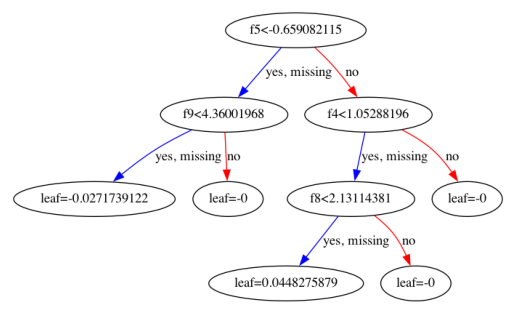

In [18]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [25]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
print(xgbc)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 
xgbc.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(xgbc, X_train, Y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, Y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

# make sure the SHAP values add up to marginal predictions
Y_pred = xgbc.predict(X_test, output_margin=True)
cm = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
# Expected outputs: [77, 7, 16]
print(cm)

Mean cross-validation score: 0.80
K-fold CV average score: 0.97
[[77  0  0]
 [ 0  7  0]
 [ 1  0 15]]


In [31]:
exp_outputs = [0, 0, 0]
for i in Y_test:
    li = i.tolist()
    if li[0] == 1:
        exp_outputs[0] += 1
    elif li[1] == 1:
        exp_outputs[1] += 1
    else:
        exp_outputs[2] += 1
print(exp_outputs)


[77, 7, 16]


# Install missing packages
$ brew install graphviz
$ brew install xgboost
$ sudo pip3 install xgboost
$ brew install lightgbm
$ sudo pip3 install lightgbm

[09:10:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




  0%|          | 0/100 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


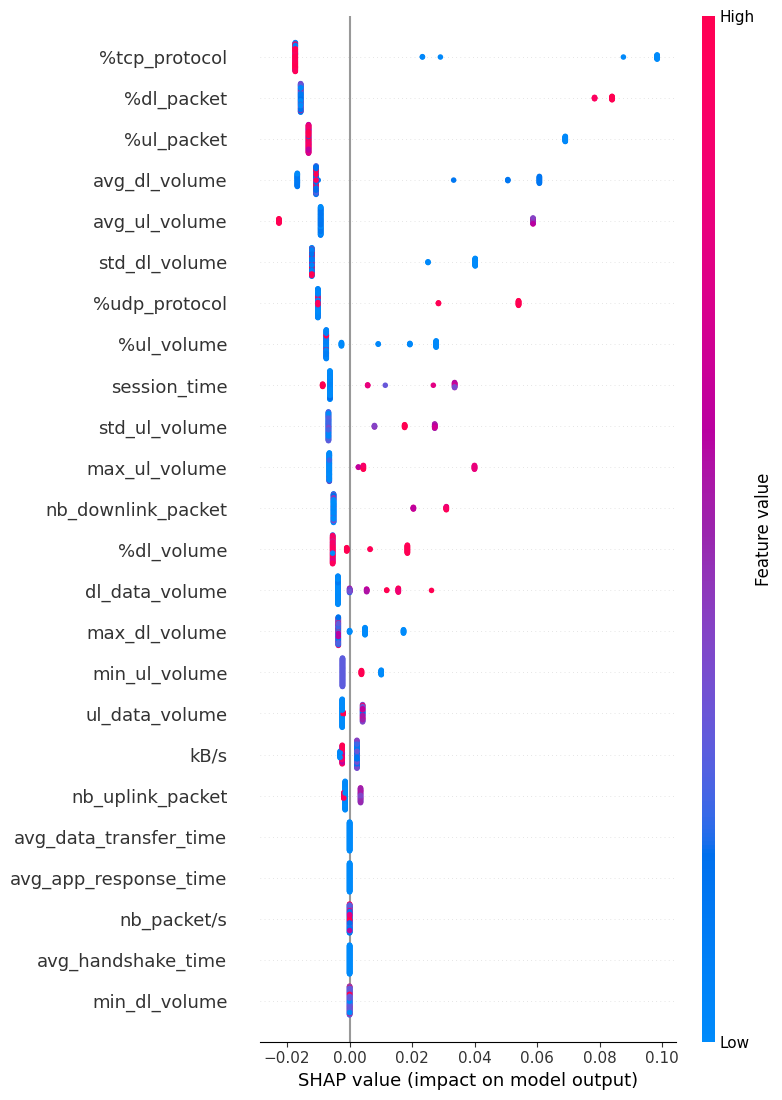

In [76]:
import shap
import warnings

model_xgb = xgb.XGBRegressor(colsample_bytree=0.055, 
                             gamma=1.5, 
                             learning_rate=0.02, 
                             max_depth=12, 
                             n_estimators=1000,
                             subsample=0.7, 
                             objective='reg:linear',
                             booster='gbtree',
                             reg_alpha=0.0, 
                             eval_metric='rmse', 
                             silent=1, 
                             random_state=7,
                            )

model_xgb.fit(X_train,Y_train)
preds = model_xgb.predict(X_test)

classes=['Web', 'Interactive', 'Video']

xg_explainer = shap.KernelExplainer(model_xgb.predict, X_test)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    shap_values = xg_explainer.shap_values(X_test)

shap.summary_plot(shap_values[2], X_test, feature_names=features, max_display=24, class_names=classes)